In [1]:
import math
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=42, cluster_std=2.0)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.3)

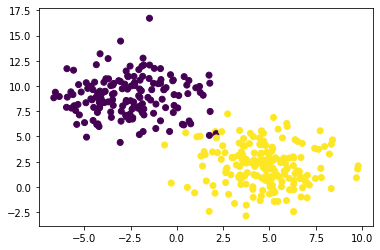

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1],  c = y_train)

In [5]:
class KNN:
    # Set number of neighbors
    def __init__(self, n_neighbors= 2):
        self.n_neighbors = n_neighbors
     
    # Train, fit
    def fit(self, X, y):       
        self.X = np.array(X)   
        self.y = np.array(y)
        
    # Predict  
    def predict(self, X):
        predictions = []
        for sample in X:  
            distances = [] 
            for x in self.X:     
                distances.append(np.sqrt(np.sum((sample-x)**2)))     
            distances = np.array(distances) 
            indexes = np.argpartition(distances, self.n_neighbors) 
            predictions.append(stats.mode(self.y[indexes[:self.n_neighbors]])[0][0]) 

        return predictions

In [6]:
k_range = list(range(1, 5))
scores = []
for k in k_range:    
    KN = KNN(k)
    KN.fit(X_train, y_train)
    yhat = KN.predict(X_test)
    scores.append(accuracy_score(y_test, yhat))

Text(0, 0.5, 'Testing Accuracy')

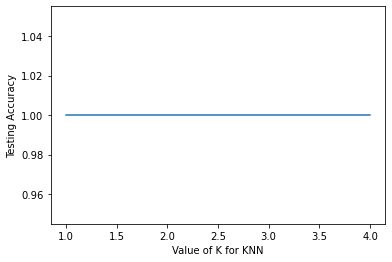

In [7]:
# Plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [8]:
KN = KNN(3)
KN.fit(X_train, y_train)
yhat = KN.predict(X_test)

In [9]:
print(f'Accuracy score {accuracy_score(y_test, yhat) * 100}% ')

Accuracy score 100.0% 


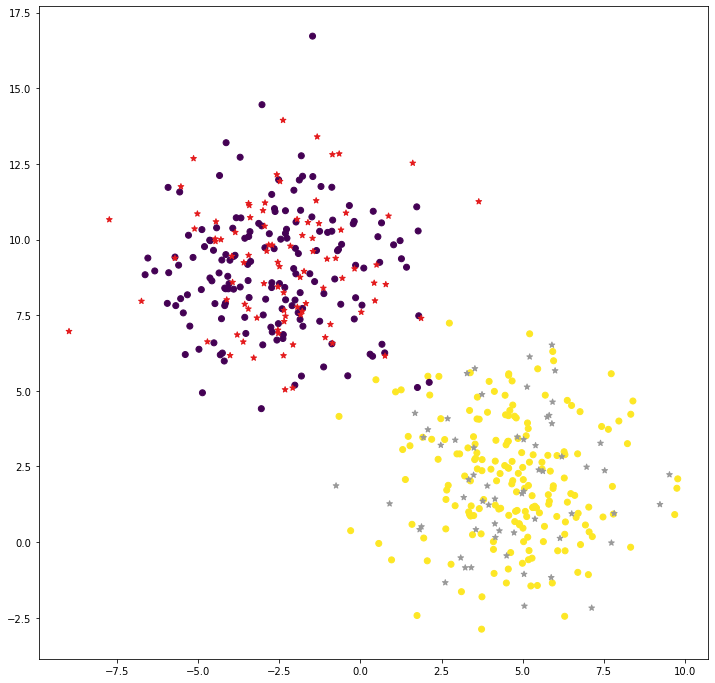

In [10]:
plt.figure(figsize=(12,12))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=yhat, marker='*',cmap='Set1')